# Project: Investigate a Dataset - [TMDB Movie Analysis]

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

# <a id='intro'></a>
## Introduction

### Dataset Description 
 This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. Column names include; 
- id -  a unique code for identifying every row in the dataset.
- tmdb_id - a unique code for identifying the movies on the imdb platform
- popularity - popularity of the movies in number
- budget - overall amount spent on the movie
- revenue - overall amount received after the release of the movie
- original_title - original title of the movie
- cast - actors and actresses featured in the movie
- homepage - homepage of the movie website
- director - individual who directed the movie
- tagline - the advertising slogan
- keywords - unique words that describe the movie
- overview - a brief summary of the movie
- runtime - time from which the movie run from start to finish
- genres - movie classification
- production_companies - company that made the production of the movie
- release_date - date the movie was released
- vote_count - the amount of people that voted for the movie
- vote_average - the average amount of vote per movie ou of ten
- release_year - the year the movie was released
- budget_adj - the amount of money spent for the budget in terms of 2010 dollars(inflation)
- revenue_adj - the amount of money received for the revenue in terms of 2010 dollars(inflation).


### Question(s) for Analysis
- what is the relationship between the vote count and the runtime
- what is the relationship between the popularity and the runtime
- what is the relationship between the popularity and the votecount


In [1]:
# importing the modules to be used for the analysis of this data
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

In [2]:
# Loading my dataset
movies = pd.read_csv('tmdb-movies.csv')
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [3]:
#Checking the shape of the datasets
movies.shape

(10866, 21)

In [4]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

From the information shown above, it is shown that there are missing information in the datasets, some of which will not be useful in this particular analysis. Also the release year is supposed to be in datetime, so it has to be changed.

In [5]:
#Changing the release year from 'int' to 'date_time'
movies['release_year'] = pd.to_datetime(movies['release_year'])

In [6]:
# Checking to see if the change has been made
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null datetime64[ns]
budget_adj      

In [7]:
#Using the describe function to check for the overall mean and percentiles of each column
movies.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,4.250000e+08,2.827124e+09


In [8]:
#Checking for duplicated values
sum(movies.duplicated())

1

In [9]:
#Dropping the duplicated values
movies.drop_duplicates(inplace=True)

In [10]:
#Confirmation to check if duplicated values have been dropped
sum(movies.duplicated())

0

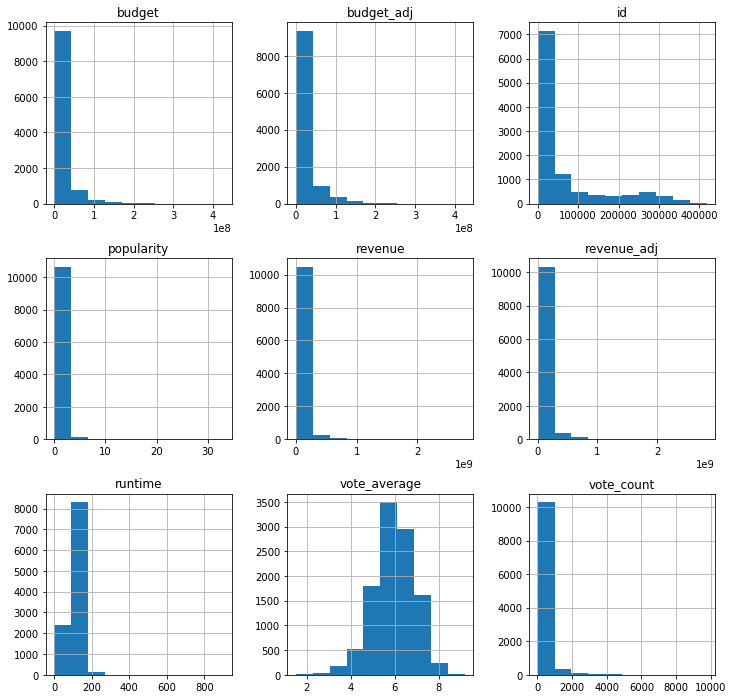

In [11]:
#Checking the distribution for each column on the dataset
movies.hist(figsize=(12,12));

### Data Cleaning

In [12]:
#Dropping some columns which will not be used in this analysis
movies.drop(['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'release_date', 'budget_adj', 'revenue_adj'], axis = 1, inplace = True)

In [13]:
#Checking for the new structure of the data after dropping some columns
movies.head()

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1970-01-01 00:00:00.000002015
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1970-01-01 00:00:00.000002015
2,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1970-01-01 00:00:00.000002015
3,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,1970-01-01 00:00:00.000002015
4,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,1970-01-01 00:00:00.000002015


In [14]:
# Checking the description of the datasets after dropping some columns
movies.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average
count,10865.000000,1.086500e+04,1.086500e+04,10865.000000,10865.000000,10865.000000
mean,0.646446,1.462429e+07,3.982690e+07,102.071790,217.399632,5.975012
std,1.000231,3.091428e+07,1.170083e+08,31.382701,575.644627,0.935138
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000
25%,0.207575,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000
50%,0.383831,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000
75%,0.713857,1.500000e+07,2.400000e+07,111.000000,146.000000,6.600000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000


From the table above, it is  shown that there are many null values in the budget, revenue and runtime columns. The budget and revenue columns can be dropped since they wouldn't be used in this analysis while the null values in the runtime column can be replaced with its mean

In [15]:
# Dropping the budget and revenue columns
movies.drop(['budget', 'revenue'], axis = 1, inplace = True)

In [16]:
# Replacing the zero values with the mean
movies.replace(0,movies.mean(axis=0),inplace=True)

The above code was gotten from stackoverflow.

In [17]:
# Checking to see the decription of the dataset again to confirm if the columns have been dropped
movies.describe()

,popularity,runtime,vote_count,vote_average
count,10865.000000,10865.000000,10865.000000,10865.000000
mean,0.646446,102.363021,217.399632,5.975012
std,1.000231,30.904043,575.644627,0.935138
min,0.000065,2.000000,10.000000,1.500000
25%,0.207575,90.000000,17.000000,5.400000
50%,0.383831,99.000000,38.000000,6.000000
75%,0.713857,111.000000,146.000000,6.600000
max,32.985763,900.000000,9767.000000,9.200000


From the description above, it is shown that the zero values in the runtime column have been replaced by the mean. Also, the revenue and budget columns have been dropped so we are now left with a concise and precise dataset relavant to the questions to be answered

In [18]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10865 entries, 0 to 10865
Data columns (total 10 columns):
popularity              10865 non-null float64
original_title          10865 non-null object
cast                    10789 non-null object
director                10821 non-null object
runtime                 10865 non-null float64
genres                  10842 non-null object
production_companies    9835 non-null object
vote_count              10865 non-null int64
vote_average            10865 non-null float64
release_year            10865 non-null datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1), object(5)
memory usage: 933.7+ KB


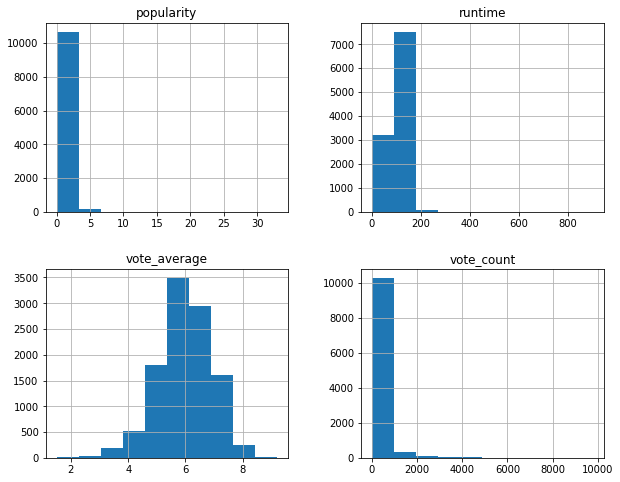

In [19]:
#Checking the distribution of the dataset after cleaning has been done
movies.hist(figsize=(10,8));

The graph above shows that the distribution did not change much after cleaning the dataset

### Question 1: what is the relationship between the vote count and the runtime?

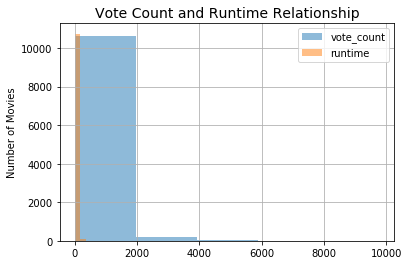

In [20]:
# defining the x axis
V_C = movies['vote_count']
# corresponding y axis values
R = movies['runtime']

movies.vote_count.hist(alpha=0.5, bins=5, label='vote_count')
movies.runtime.hist(alpha=0.5, bins=5, label='runtime')
plt.title("Vote Count and Runtime Relationship", fontsize=14);
plt.ylabel("Number of Movies")
plt.legend();

The graph above shows the relationship of the vot count and runtime on the dataset, it shows that there is a similar correlation between the vote count and runtime

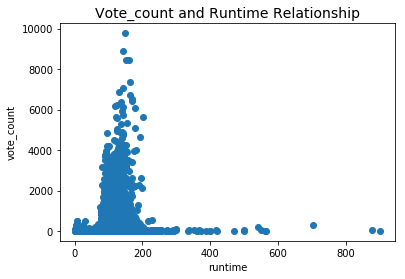

In [44]:
#Also using a scatterplot for verification
def scatter_plot(arg1, arg2, arg3, arg4, arg5):

# plotting the points
    plt.scatter(arg1, arg2)

# naming the x axis
    plt.xlabel(arg3)
# naming the y axis
    plt.ylabel(arg4)

#Giving the plot a title
    plt.title(arg5, fontsize=14);
    plt.show()


scatter_plot(R, V_C, 'runtime', 'vote_count', "Vote_count and Runtime Relationship")

The scatterplot shows that there is a similar correlation as shown in the previous graph as the graph is skewed to the right.

### Question 2: what is the relationship between the popularity and the runtime

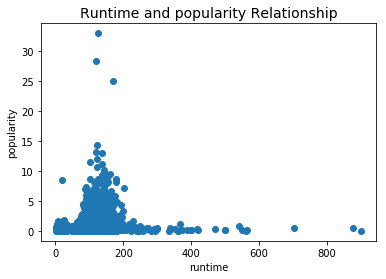

In [45]:
# Using a scatterplot to check the relationship
P = movies['popularity']

scatter_plot(R, P, 'runtime', 'popularity', "Runtime and popularity Relationship")

The scatterplot graph above shows some skewness to the right and also shows that majority of the movie relased have their runtime to be less than 200 minutes

### Question 3: what is the relationship between the popularity and the votecount

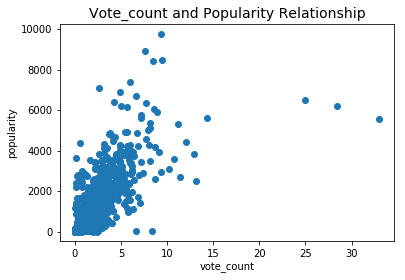

In [47]:
# Using scatterplot to show the relationship between popularity and votecount
scatter_plot(P, V_C, 'vote_count', 'popularity', "Vote_count and Popularity Relationship")

The scatterplot graph above shows the relationship between the popularity and the vote count. It shows that the vote count of the movie did not really determine how popular the movie would be

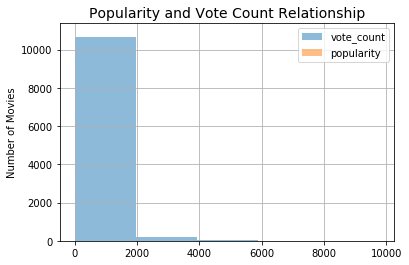

In [48]:
#Bar graph to confirm if there are any correlation between the popularity and vote counts of a movie
P_VC2 = movies.vote_count.hist(alpha=0.5, bins=5, label='vote_count')
movies.popularity.hist(alpha=0.5, bins=5, label='popularity')
plt.title("Popularity and Vote Count Relationship", fontsize=14);
plt.ylabel("Number of Movies")
plt.legend();

The bar graph above also shows that there isn't really any correlation between the popularity and the vote count of the movie

In [49]:
#Using another method for comfirmation
movies.describe().vote_count

count    10865.000000
mean       217.399632
std        575.644627
min         10.000000
25%         17.000000
50%         38.000000
75%        146.000000
max       9767.000000
Name: vote_count, dtype: float64

In [50]:
# minumum to maximum percentiles values for the vote_count
bin_edges = [10, 18, 46, 173, 9767]

In [51]:
# Classifying the minimun to maximum percentiles to words
bin_names = ['high', 'mod_high', 'medium', 'low']

In [52]:
# Adding as a new column
movies['vote_levels'] = pd.cut(movies['vote_count'], bin_edges, labels=bin_names)
movies.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,vote_levels
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124.0,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,1970-01-01 00:00:00.000002015,low
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120.0,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,1970-01-01 00:00:00.000002015,low
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119.0,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,1970-01-01 00:00:00.000002015,low
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136.0,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,1970-01-01 00:00:00.000002015,low
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137.0,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,1970-01-01 00:00:00.000002015,low


In [53]:
# Checking again to see if the votes correlate with popularity
movies.groupby('vote_levels').mean().popularity

vote_levels
high        0.223352
mod_high    0.324672
medium      0.552263
low         1.659346
Name: popularity, dtype: float64

It is shown from above that very popular movies had low votes 

In [54]:
# Checking again to see if the votes correlate with runtime
movies.groupby('vote_levels').mean().runtime

vote_levels
high         98.263774
mod_high    100.684334
medium      101.246961
low         110.301678
Name: runtime, dtype: float64

 It is also shown from above that movies with lower runtime had higher votes

 <a id='conclusions'></a>
## Conclusions

From the dataset chosen, some columns had to be dropped because they were not relevant to the question posed so some inspection and cleaning had to be done in which i had to replace zero values with their mean. There were not much duplicates in the datasets, there were many zero values in the revenue and budget column which is a very important aspect of the data scope so I had to drop the columns to work with others because if i dropped the rows, it would eliminate almost half of the dataset.

From the EDA, it is concluded that;

- Movies with high vote count had lower runtime
- Movies that were popular did not have any correlation with the runtime
- Movies that were popular did not have any correlation with the vote count i.e. movies with low popularity was shown to have higher vote count


### Limitations
- The dataset had many zeros in the revenue and budget columns